<a href="https://colab.research.google.com/github/Prasadkpd/Machine-Learning/blob/master/K-Means%20Clustering/K_Means_Clustering_Algorithm_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

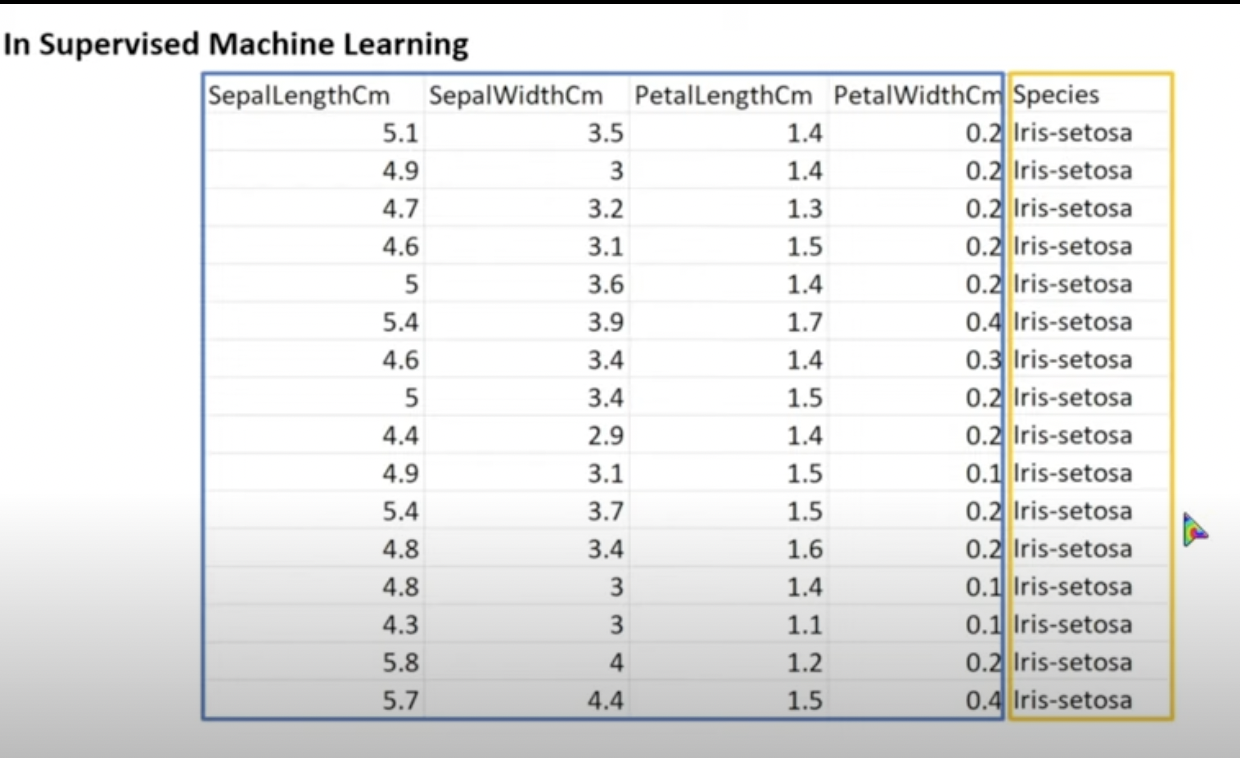

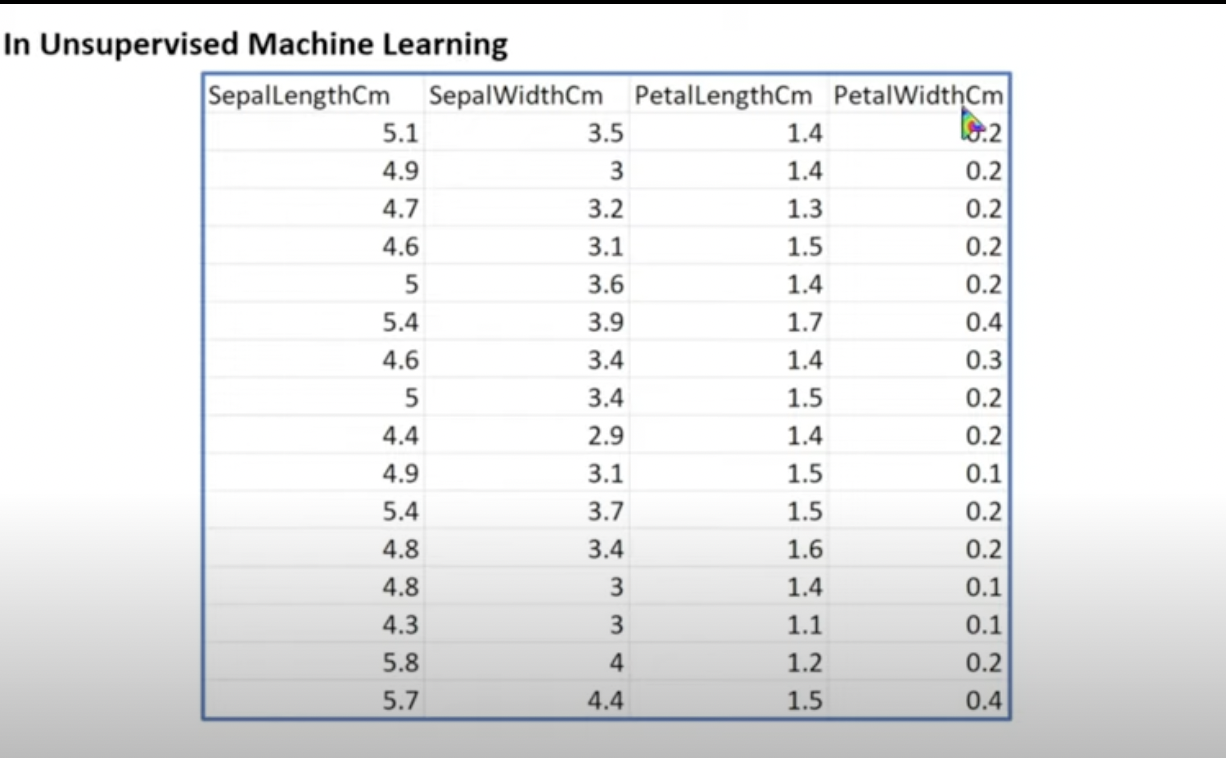

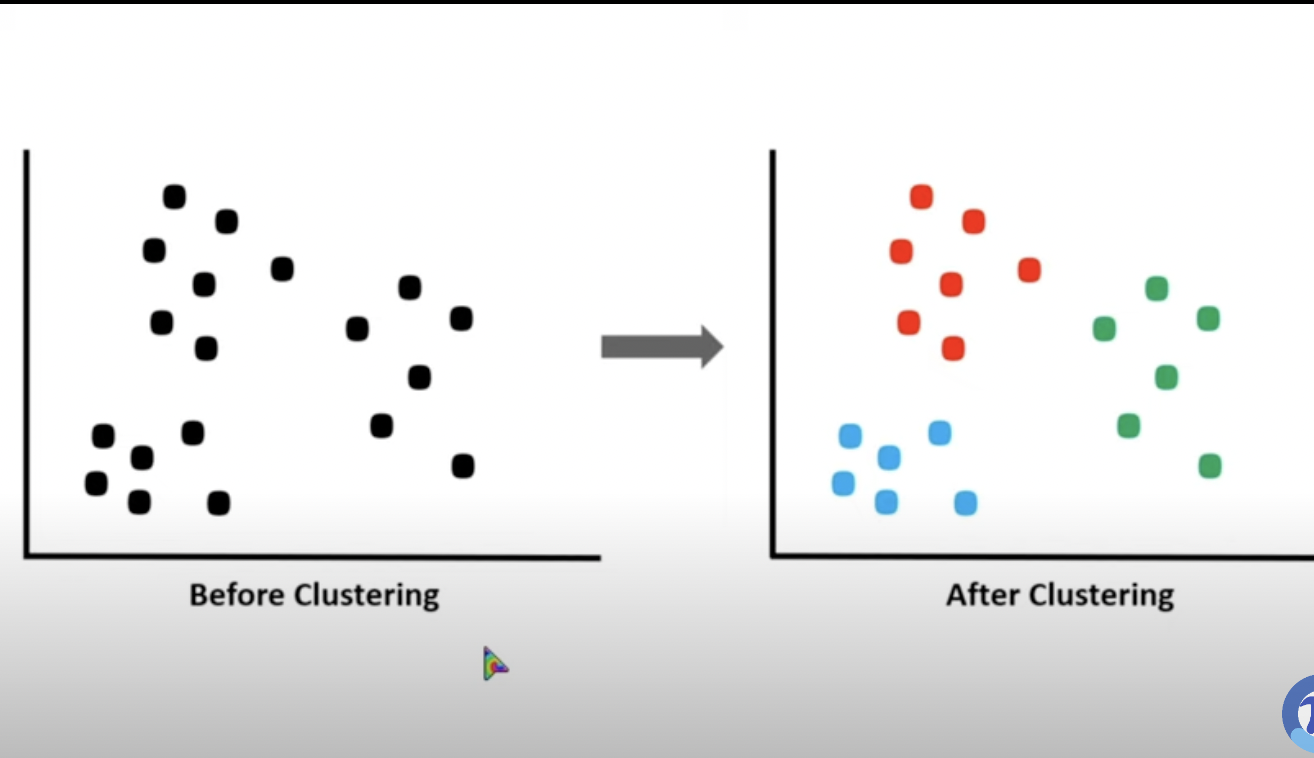

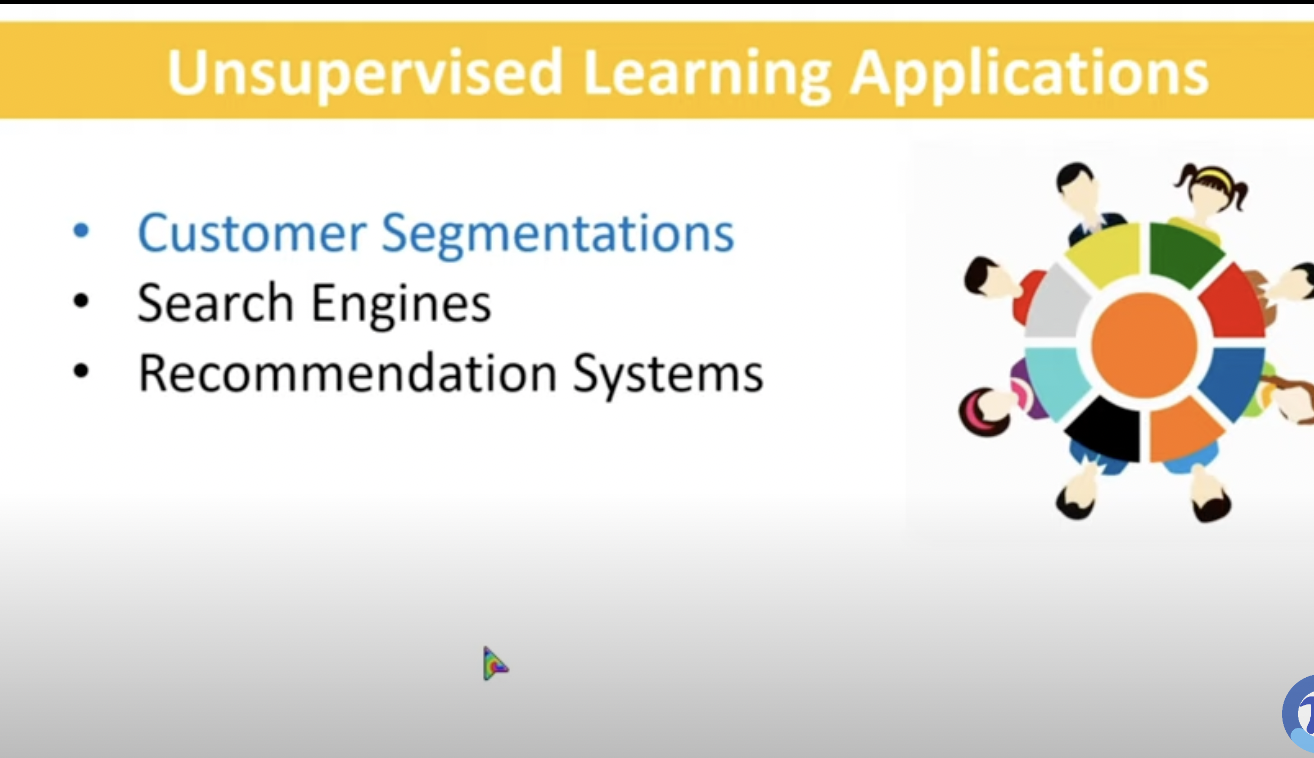

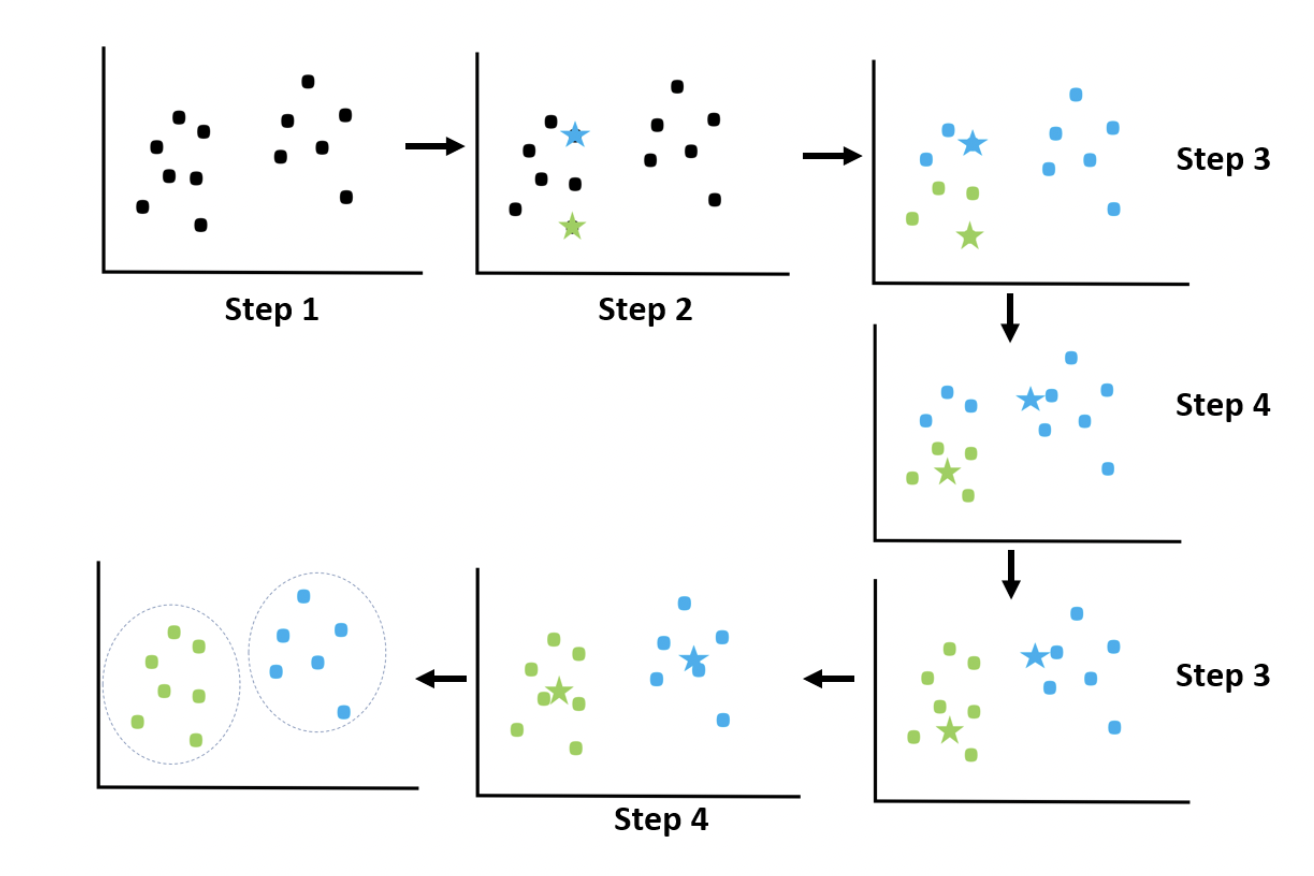

## Elbow Method

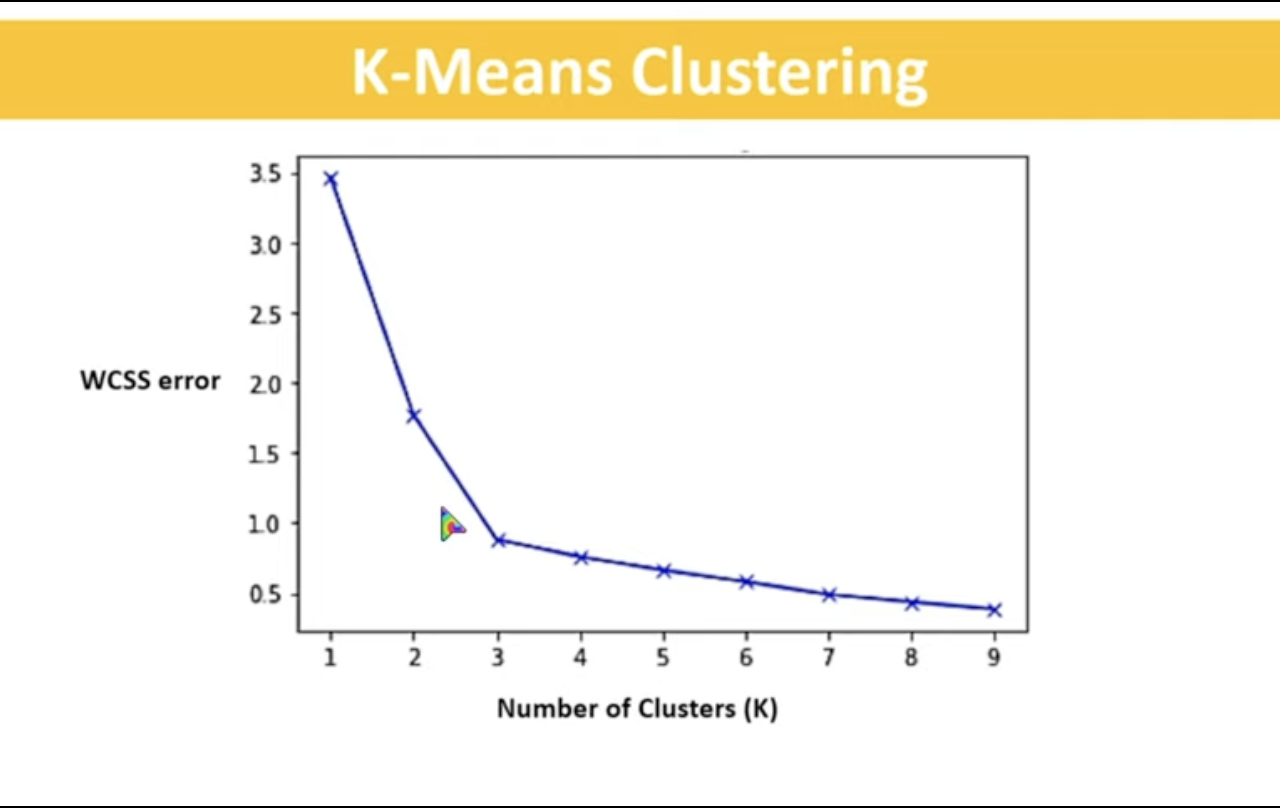

## Implementation

In [1]:
import pandas as pd
data = pd.read_csv('Customers.csv')

In [2]:
data.sample(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
57           58    Male   69                  44                      46
47           48  Female   27                  40                      47
84           85  Female   21                  54                      57
31           32  Female   21                  30                      73
173         174    Male   36                  87                      92

In [3]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

Annual Income (k$)  Spending Score (1-100)
65                   48                      59
64                   48                      51
121                  67                      40
89                   58                      46
85                   54                      46

In [5]:
data = data.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data.sample(5)

income  score
27       28     61
127      71     95
111      63     54
48       40     42
107      63     46

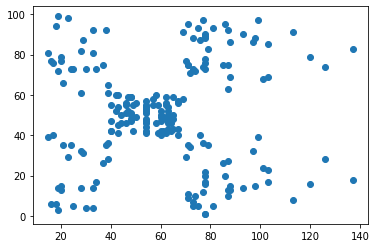

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data['income'],data[['score']])

In [7]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
  model = KMeans(n_clusters=k)
  model.fit(data[['income','score']])
  wcss_error.append(model.inertia_)

In [8]:
wcss_error

[269981.28,
 183069.17582751298,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25094.432930794697,
 22225.448862422796,
 19641.456216651564]

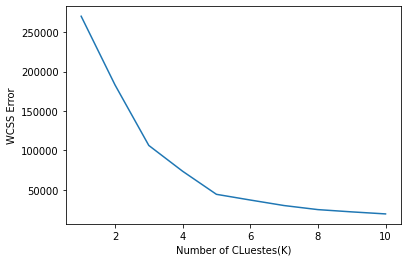

In [9]:
plt.xlabel('Number of CLuestes(K)')
plt.ylabel('WCSS Error')
plt.plot(k_values,wcss_error)

In [10]:
# Now consider k as 5
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)
pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [11]:
data.head(5)

income  score
0      15     39
1      15     81
2      16      6
3      16     77
4      17     40

In [13]:
data['cluster'] = pred
data.head(5)

income  score  cluster
0      15     39        3
1      15     81        0
2      16      6        3
3      16     77        0
4      17     40        3

In [14]:
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]
c4 = data[data['cluster']==3]
c5 = data[data['cluster']==4]


In [15]:
c4.head(5)

income  score  cluster
0      15     39        3
2      16      6        3
4      17     40        3
6      18      6        3
8      19      3        3

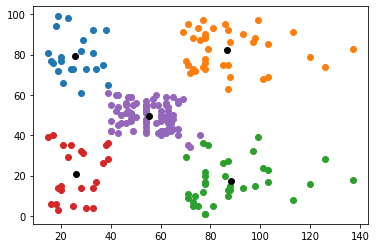

In [20]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],color='black')

In [19]:
model.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])